In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [15]:
data = pd.read_csv("C:\\Users\\jchkh\\Desktop\\Logit_HelenWall\\Data Sources\\binomial (training).csv")

y_train = data[['Win/Loss (Win 1, Loss 0)']].to_numpy()
x_train = data[['Points Team Scored']].to_numpy()

#Adds intercept term to match R's default glm behavior
#In excel solver, akin to unchecking "Make unconstrained variables non-negative"
#Source: https://stackoverflow.com/questions/64229454/different-glm-result-for-python-and-r-with-binomial-regression

x_train = sm.tools.tools.add_constant(x_train)

In [16]:
lm = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

In [17]:
print(lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  267
Model:                            GLM   Df Residuals:                      265
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -154.63
Date:                Mon, 30 May 2022   Deviance:                       309.26
Time:                        23:09:08   Pearson chi2:                     257.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1969      1.021     -6.068      0.0

In [18]:
data['predicted'] = lm.predict(x_train)

In [19]:
data['predicted_win'] = np.nan

data.loc[data['predicted'] >= 0.5, 'predicted_win'] = 1
data.loc[data['predicted'] < 0.5, 'predicted_win']  = 0

# Plotting

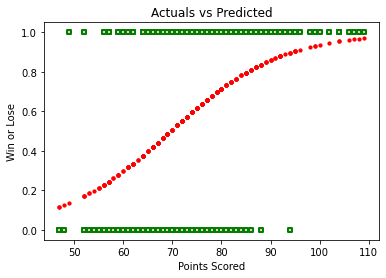

In [27]:
plt.scatter(data['Points Team Scored'], data['Win/Loss (Win 1, Loss 0)'], c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 20)
 
plt.scatter(data['Points Team Scored'], data['predicted'], c ="yellow",
            linewidths = 2,
            marker ="o",
            edgecolor ="red",
            s = 5)

plt.xlabel("Points Scored")
plt.ylabel("Win or Lose")
plt.title("Actuals vs Predicted")
plt.show()